In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path = "sampled_file.csv"

In [3]:
df = pd.read_csv(path, delimiter=',',nrows=100000, low_memory=False)

In [4]:
df.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,999786,40,Fri Jun 28 07:31:38 CEST 2024,3.0,Landes,40017,CAPTAGE DE MARSEILLON P1,"['348AG20', '350AA01']",42.90,09782X0006/P1,...,-0.724721,43.760552,40309.0,3.127198e+07,68.6,390.0,23080,0,2,Average
1,3272462,66,Thu Jan 25 05:52:14 CET 2024,NaN,Pyrénées-Orientales,66190,ROBOUL,['681AM00'],65.00,10904X0105/ROBOUL,...,NaN,NaN,NaN,NaN,11.1,3752.0,20390,10.9,3,Very Low
2,2206402,40,Fri Jun 28 07:31:38 CEST 2024,10.0,Landes,40184,Piezo rte d'Escource,['308AC01'],28.00,08977X0036/P,...,-1.067265,44.345589,40217.0,1.891301e+07,0.6,7364.0,22080,24.7,5.5,High
3,1359218,04,Fri Jun 28 07:31:38 CEST 2024,20.5,Alpes-de-Haute-Provence,04143,Oraison - la Grande Bastide,['716CA01'],344.00,09692X0122/PIEZ,...,5.894518,43.934494,4034.0,2.168506e+09,0.1,5981.0,23050,18.4,8,Low
4,1260694,86,Fri Jun 28 07:31:38 CEST 2024,NaN,Vienne,86141,DAUFFARD,['139AE05'],134.36,06131X0035/DAUFFA,...,0.557187,46.513545,86268.0,1.220306e+07,12,670.0,23000,0,24,Very High


In [5]:
df.describe()

,row_index,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_continuity_code,piezo_producer_code,meteo_id,meteo_latitude,meteo_longitude,...,prelev_volume_1,prelev_longitude_1,prelev_latitude_1,prelev_commune_code_insee_1,prelev_volume_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_pop_commune
count,1.000000e+05,93685.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.493700e+04,1.000000e+05,100000.000000,100000.000000,...,8.054700e+04,80547.000000,80547.000000,80547.000000,8.046300e+04,80463.000000,80463.000000,80463.000000,8.656000e+04,99073.000000
mean,1.557671e+06,86.552746,147.537420,2.217127,46.418512,1.999140,5.580579e+12,3.755251e+07,2.193412,46.424104,...,6.739529e+08,1.990092,46.536935,45200.925559,2.558520e+08,1.991632,46.533431,45301.416216,1.990674e+08,6976.327254
std,9.576470e+05,250.844230,191.066092,2.713364,2.177324,0.029313,1.129599e+13,2.087486e+07,2.673441,2.141565,...,3.858799e+09,2.628775,2.106641,24623.798263,2.030150e+09,2.629158,2.103543,24667.892821,1.283453e+09,32664.713312
min,5.000000e+01,0.000000,-999.000000,-4.657129,41.399732,1.000000,5.300000e+01,1.027003e+06,-4.771667,42.384667,...,0.000000e+00,-4.487265,42.407792,1010.000000,1.359000e+03,-4.731051,42.407792,1027.000000,0.000000e+00,6.000000
25%,7.430865e+05,16.500000,41.250000,-0.104026,44.497472,2.000000,2.910000e+02,1.927601e+07,-0.148667,44.534667,...,8.487060e+05,-0.244706,44.686682,26038.000000,6.427420e+05,-0.267168,44.686682,26038.000000,7.753715e+06,479.000000
50%,1.491372e+06,38.000000,107.470000,1.918437,46.387747,2.000000,3.000000e+02,3.420900e+07,1.903167,46.375333,...,2.372064e+06,1.617243,46.608652,41198.000000,1.419310e+06,1.601604,46.618388,41104.000000,1.724466e+07,1234.000000
75%,2.229692e+06,80.000000,186.130000,4.177005,48.214196,2.000000,1.219000e+03,5.308300e+07,4.168000,48.205167,...,1.573000e+07,3.694844,48.333176,67025.000000,5.659295e+06,3.712284,48.301835,67482.000000,4.052909e+07,3714.000000
max,3.294021e+06,5233.400000,2150.000000,9.519890,50.971087,2.000000,4.930211e+13,9.558000e+07,8.145500,50.833833,...,3.763868e+10,8.087510,50.948383,95170.000000,3.596148e+10,8.097536,50.864884,95052.000000,2.566101e+10,873076.000000


In [6]:
threshold = 0.6 # min syndical acceptable


non_nan_percentage = df.notna().mean()

# Drop columns where non-NaN percentage is less than 60%
df_filtered = df.loc[:, non_nan_percentage >= threshold]

In [7]:
df_filtered['piezo_groundwater_level_category'].unique()

array(['Average', 'Very Low', 'High', 'Low', 'Very High'], dtype=object)

<Axes: xlabel='piezo_groundwater_level_category', ylabel='Count'>

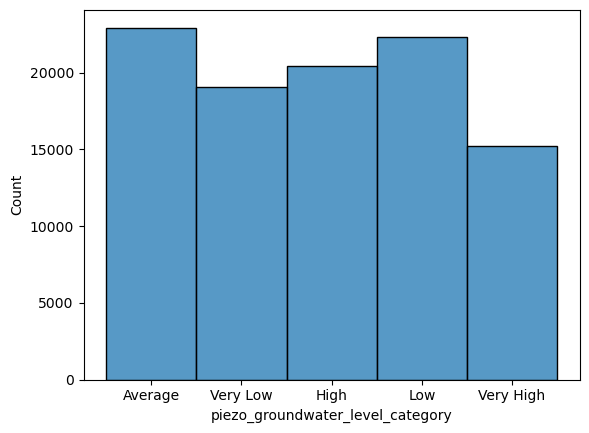

In [8]:
sns.histplot(data=df_filtered, x='piezo_groundwater_level_category')

In [9]:
df_categorical = df_filtered.select_dtypes(include=['object','category'])

In [10]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
df_categorical.head()

,piezo_station_department_code,piezo_station_update_date,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_bss_code,piezo_station_commune_name,piezo_station_bss_id,piezo_bss_code,piezo_measurement_date,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_name,piezo_producer_name,piezo_measure_nature_code,piezo_measure_nature_name,meteo_name,meteo_date,hydro_station_code,hydro_observation_date_elab,hydro_status_label,hydro_method_label,hydro_qualification_label,hydro_hydro_quantity_elab,prelev_structure_code_0,prelev_usage_label_0,prelev_volume_obtention_mode_label_0,prelev_structure_code_1,prelev_usage_label_1,prelev_volume_obtention_mode_label_1,prelev_structure_code_2,prelev_usage_label_2,prelev_volume_obtention_mode_label_2,insee_%_agri,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,40,Fri Jun 28 07:31:38 CEST 2024,Landes,40017,CAPTAGE DE MARSEILLON P1,"['348AG20', '350AA01']",09782X0006/P1,Audignon,BSS002FLZP,09782X0006/P1,2021-01-15,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,Point lié au point précédent,Conseil Général des Landes (22400001800016),0,Inconnue,SAMADET,2021-01-15,Q124001001,2021-01-15,Donnée pré-validée,Interpolation,Bonne,QmJ,OPR0000598358,EAU POTABLE,Mesure directe,OPR0000256580,IRRIGATION,Mesure directe,OPR0000009827,IRRIGATION,Mesure directe,68.6,23080,0,2,Average
1,66,Thu Jan 25 05:52:14 CET 2024,Pyrénées-Orientales,66190,ROBOUL,['681AM00'],10904X0105/ROBOUL,Salses-le-Château,BSS002MNTY,10904X0105/ROBOUL,2023-05-23,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,Point lié au point précédent,Service Géologique Régional Languedoc-Roussillon (294),D,Dynamique,PERPIGNAN,2023-05-23,Y067406001,2023-05-23,Donnée validée,Interpolation,Douteuse,QmJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,20390,10.9,3,Very Low
2,40,Fri Jun 28 07:31:38 CEST 2024,Landes,40184,Piezo rte d'Escource,['308AC01'],08977X0036/P,Mimizan,BSS002BSTP,08977X0036/P,2022-04-14,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,Point lié au point précédent,Conseil Général des Landes (22400001800016),0,Inconnue,BISCARROSSE,2022-04-14,S321401001,2022-04-14,Donnée pré-validée,Interpolation,Non qualifiée,QmJ,OPR0000013382,"INDUSTRIE et ACTIVITES ECONOMIQUES (hors irrigation, hors énergie)",Mesure directe,OPR0000022847,IRRIGATION,Mesure directe,OPR0000598410,"INDUSTRIE et ACTIVITES ECONOMIQUES (hors irrigation, hors énergie)",Mesure directe,0.6,22080,24.7,5.5,High
3,04,Fri Jun 28 07:31:38 CEST 2024,Alpes-de-Haute-Provence,04143,Oraison - la Grande Bastide,['716CA01'],09692X0122/PIEZ,Oraison,BSS002FDBD,09692X0122/PIEZ,2021-05-31,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,Point lié au point précédent,Service Géologique Régional Provence-Alpes-Côte d'Azur (296),N,Naturel,LE CASTELLET,2021-05-31,X133501001,2021-05-31,Donnée pré-validée,Interpolation,Bonne,QmJ,OPR0000048960,EAU TURBINEE (barrage),Mesure indirecte,OPR0000048951,EAU TURBINEE (barrage),Mesure indirecte,OPR0000048944,EAU TURBINEE (barrage),Mesure indirecte,0.1,23050,18.4,8,Low
4,86,Fri Jun 28 07:31:38 CEST 2024,Vienne,86141,DAUFFARD,['139AE05'],06131X0035/DAUFFA,Magné,BSS001PQLN,06131X0035/DAUFFA,2021-04-23,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,Point lié au point précédent,Conseil Régional de Poitou-Charentes (23860001900042),N,Naturel,LE VIEUX CERIER_SAPC,2021-04-23,L231301401,2021-04-23,Donnée pré-validée,Interpolation,Bonne,QmJ,OPR0000083515,EAU POTABLE,Volume mesuré,OPR0000083528,EAU POTABLE,Volume mesuré,OPR0000083545,EAU POTABLE,Volume mesuré,12,23000,0,24,Very High


In [11]:
def transform_categorical_and_date(df):
    df['insee_%_agri_num'] = pd.to_numeric(df['insee_%_agri'], errors='coerce')
    df['insee_med_living_level_num'] = pd.to_numeric(df['insee_med_living_level'], errors='coerce')
    df['insee_%_ind_num'] = pd.to_numeric(df['insee_%_ind'], errors='coerce')
    df['insee_%_const_num'] = pd.to_numeric(df['insee_%_const'], errors='coerce')

    df = df.replace({'piezo_station_department_code' : {x:f'{x:02}' for x in range(100)}})
    df["meteo_date_year"] = pd.to_datetime(df['meteo_date']).dt.year
    df["meteo_date_month"] = pd.to_datetime(df['meteo_date']).dt.month
    df["piezo_date_year"] = pd.to_datetime(df['piezo_measurement_date']).dt.year
    df["piezo_date_month"] = pd.to_datetime(df['piezo_measurement_date']).dt.month
    
    return df

In [12]:
df = df_filtered.copy()
df = transform_categorical_and_date(df)

In [13]:
cat_col=['piezo_station_department_code', 'piezo_obtention_mode', 'piezo_status','piezo_qualification', 'piezo_continuity_name', 'piezo_measure_nature_code', 'hydro_qualification_label', 'hydro_status_label', 'hydro_method_label', 'hydro_hydro_quantity_elab', 'prelev_usage_label_0','prelev_volume_obtention_mode_label_0', 'prelev_usage_label_1', 'prelev_volume_obtention_mode_label_1','prelev_usage_label_2', 'prelev_volume_obtention_mode_label_2']

In [14]:
numerical_col = df.select_dtypes(include='number').columns.to_list()

In [15]:
numerical_col.remove('row_index')

# Split

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier

df1 = df.copy()
y = df1.pop('piezo_groundwater_level_category')
X = df1[numerical_col+cat_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Baseline

In [17]:
dummy_clf=DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

In [18]:
print(classification_report(y_pred_dummy, y_test))

              precision    recall  f1-score   support

     Average       0.22      0.22      0.22      4581
        High       0.20      0.21      0.21      4054
         Low       0.22      0.22      0.22      4460
   Very High       0.15      0.16      0.15      3023
    Very Low       0.20      0.19      0.19      3882

    accuracy                           0.20     20000
   macro avg       0.20      0.20      0.20     20000
weighted avg       0.20      0.20      0.20     20000



# LightGBM

In [19]:
col_transformer = make_column_transformer(
    (OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1), cat_col),
    remainder = 'passthrough'
)
pipeline = make_pipeline(col_transformer, LGBMClassifier(random_state=42))

pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10767
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 65
[LightGBM] [Info] Start training from score -1.474142
[LightGBM] [Info] Start training from score -1.588227
[LightGBM] [Info] Start training from score -1.495328
[LightGBM] [Info] Start training from score -1.884615
[LightGBM] [Info] Start training from score -1.657185


/home/rhosane/anaconda3/envs/hickathon/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['piezo_station_department_code',
                                                   'piezo_obtention_mode',
                                                   'piezo_status',
                                                   'piezo_qualification',
                                                   'piezo_continuity_name',
                                                   'piezo_measure_nature_code',
                                                   'hydro_qualification_label',
                                                   'hydro_status_label',
                                                   'hydro_method_label',
                                                   'hydro_hydro_quantity_elab',
                                                   'prelev_usage_label_0',
                                                   'prelev_volume_obtention_mode_label_0',
                                                   'prelev_usage_label_1',
                                                   'prelev_volume_obtention_mode_label_1',
                                                   'prelev_usage_label_2',
                                                   'prelev_volume_obtention_mode_label_2'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [20]:
y_predicted = pipeline.predict(X_test)
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

     Average       0.45      0.51      0.48      4145
        High       0.47      0.48      0.48      3943
         Low       0.53      0.48      0.50      4830
   Very High       0.60      0.63      0.61      2932
    Very Low       0.71      0.65      0.67      4150

    accuracy                           0.54     20000
   macro avg       0.55      0.55      0.55     20000
weighted avg       0.55      0.54      0.54     20000



In [21]:
test = pd.read_csv('X_test_Hi5.csv',nrows=611208)
test1 = transform_categorical_and_date(test)
result = pipeline.predict(test1[numerical_col+cat_col])
df_result = pd.DataFrame({"row_index":test['row_index'], "piezo_groundwater_level_category":result})
df_result.to_csv("y_test_submission_Hi5.csv", index=False)

/tmp/ipykernel_8767/3259073440.py:1: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('X_test_Hi5.csv',nrows=611208)


# FLAML

In [22]:
from flaml import AutoML

settings = {
    "time_budget": 120,  # in seconds
    "metric": "macro_f1",
    "estimator_list": ["lgbm"],
    "log_file_name": "watertable.log",
}
automl = AutoML()
automl.fit(X_train, y_train, task="multiclass", **settings)

[flaml.automl.logger: 12-27 10:14:13] {1680} INFO - task = multiclass
[flaml.automl.logger: 12-27 10:14:13] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 12-27 10:14:13] {1789} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 12-27 10:14:13] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 12-27 10:14:13] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-27 10:14:13] {2345} INFO - Estimated sufficient time budget=7723s. Estimated necessary time budget=8s.
[flaml.automl.logger: 12-27 10:14:13] {2392} INFO -  at 1.3s,	estimator lgbm's best error=0.7347,	best estimator lgbm's best error=0.7347
[flaml.automl.logger: 12-27 10:14:13] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-27 10:14:13] {2392} INFO -  at 1.3s,	estimator lgbm's best error=0.7347,	best estimator lgbm's best error=0.7347
[flaml.automl.logger: 12-27 10:14:13] {2219} INFO - iteration 2, current learner lgbm
[flam

In [23]:
y_pred = automl.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

     Average       0.61      0.62      0.62      4541
        High       0.65      0.64      0.64      4150
         Low       0.68      0.65      0.66      4594
   Very High       0.75      0.80      0.78      2883
    Very Low       0.82      0.81      0.81      3832

    accuracy                           0.69     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.69      0.69      0.69     20000



In [24]:
print("Best hyperparmeter config:", automl.best_config)

Best hyperparmeter config: {'n_estimators': 280, 'num_leaves': 261, 'min_child_samples': 5, 'learning_rate': 0.1263878004699938, 'log_max_bin': 8, 'colsample_bytree': 0.4842901996865612, 'reg_alpha': 0.0043659867548350275, 'reg_lambda': 0.008707382321238915}


In [25]:
y_pred_flaml = automl.predict(test1[numerical_col+cat_col])


In [26]:
df_result = pd.DataFrame({"row_index":test['row_index'], "piezo_groundwater_level_category":y_pred_flaml})
df_result.to_csv("y_test_submission_flaml.csv", index=False)

# Feature importance

In [28]:
feature_importance = pd.DataFrame({'feature':automl.feature_names_in_, 'importance':automl.feature_importances_})
feature_importance.sort_values(by='importance', inplace=True)

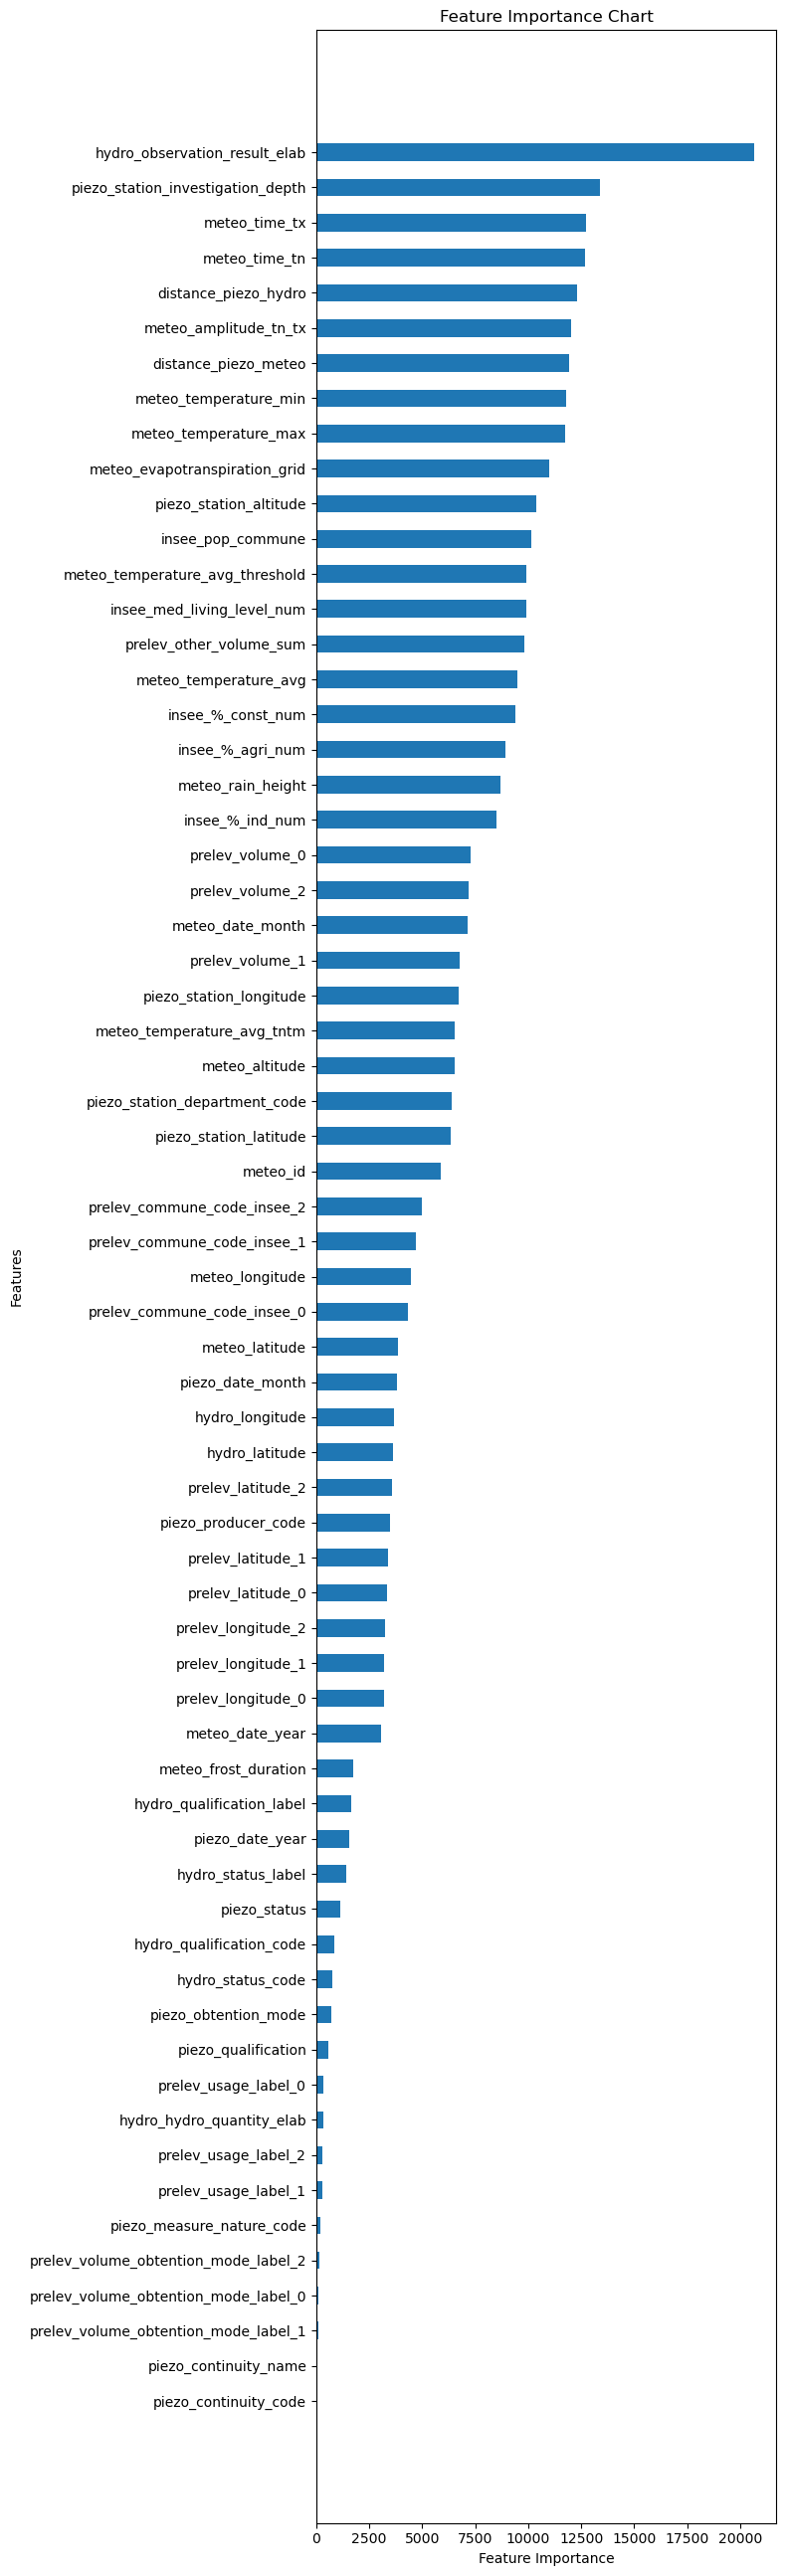

In [30]:
plt.figure(figsize=(8, len(automl.feature_names_in_) * 0.4))  # Adjust the figure size based on the number of features
plt.barh(feature_importance.iloc[:,0], feature_importance.iloc[:,1], height=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Chart')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()